In [98]:
import pandas as pd

In [99]:

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv("../data/imports-85.data", names=columns, na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data found! removing rows with missing data!

In [100]:
dataDropped = data.dropna().reset_index()
dataDropped.info()

print(dataDropped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              159 non-null    int64  
 1   symboling          159 non-null    int64  
 2   normalized-losses  159 non-null    float64
 3   make               159 non-null    object 
 4   fuel-type          159 non-null    object 
 5   aspiration         159 non-null    object 
 6   num-of-doors       159 non-null    object 
 7   body-style         159 non-null    object 
 8   drive-wheels       159 non-null    object 
 9   engine-location    159 non-null    object 
 10  wheel-base         159 non-null    float64
 11  length             159 non-null    float64
 12  width              159 non-null    float64
 13  height             159 non-null    float64
 14  curb-weight        159 non-null    int64  
 15  engine-type        159 non-null    object 
 16  num-of-cylinders   159 non

For whatever reason, some numbers were written as words! converting to int...

In [101]:
%pip install word2number
from word2number import w2n

strangeColumns = ["num-of-doors", "num-of-cylinders"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = dataDropped[strangeColumns]
standardData = dataDropped[standardColumns]

strangeData = strangeData.map(lambda a : w2n.word_to_num(str(a)))

data = pd.concat([standardData, strangeData], axis=1)
data.info()
print(data)

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stroke             159 non-null    float64
 1   horsepower         159 non-null    float64
 2   bore               159 non-null    float64
 3   normalized-losses  159 non-null    float64
 4   height             159 non-null    float64
 5   curb-weight        159 non-null    int64  
 6   width              159 non-null    float64
 7   engine-size        159 non-null    int64  
 8   symboling          159 non-null    int64  
 9   drive-wheels       159 non-null    object 
 10  engine-location    159 non-null    object 
 11  highway-mpg        159 non-null    int64  
 12  compression-ratio  159 non-null    float64
 13  fuel-system        159 non-null    object 
 14  body-style         159 non-null    object 
 15  city-mpg


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Strings found! Using one-hot encoding to change data to numeric

In [102]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

strangeColumns = ["engine-location", "body-style", "drive-wheels", "engine-type", "fuel-type", "make", "fuel-system", "aspiration"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = pd.DataFrame()
standardData = data[standardColumns]

for column in strangeColumns:
    local_cat = data[[column]]  
    local_cat.sample(10)

    encoder = OneHotEncoder()
    local_cat = encoder.fit_transform(local_cat).toarray()
    local_data = pd.DataFrame(local_cat, columns=encoder.get_feature_names_out([column]))
    strangeData = pd.concat([strangeData, local_data], axis=1)
    print(local_data)
dataCleaned = pd.concat([strangeData, standardData], axis=1)
print("#" * 100)
print(data)
#data.info()

     engine-location_front
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
..                     ...
154                    1.0
155                    1.0
156                    1.0
157                    1.0
158                    1.0

[159 rows x 1 columns]
     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                       0.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
..                      ...                 ...                   ...   
154                     0.0                 0.0                   0.0   
155                     0.0                 0.0                   0.

Unscaled values found! Using Standard scaler to scale

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

newColumns = list(dataCleaned.columns.values)

target = ["price", "peak-rpm", "horsepower"]
X = dataCleaned[list(set(newColumns) - set(target))]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train_set_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(train_set_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,make_jaguar,stroke,engine-type_l,fuel-type_gas,fuel-system_spdi,normalized-losses,height,make_dodge,engine-type_dohc,engine-location_front,...,make_nissan,wheel-base,fuel-type_diesel,num-of-doors,make_saab,length,drive-wheels_rwd,aspiration_std,engine-type_ohcv,fuel-system_1bbl
0,0.0,-2.171550,-0.259645,0.342997,-0.235702,-0.458103,-0.658391,-0.146647,-0.209657,0.0,...,-0.342997,-0.203360,-0.342997,0.816497,-0.209657,-0.036693,-0.61385,0.483494,-0.209657,-0.259645
1,0.0,0.609418,-0.259645,0.342997,-0.235702,-1.117910,1.857374,-0.146647,-0.209657,0.0,...,-0.342997,-0.351319,-0.342997,0.816497,-0.209657,-1.444262,-0.61385,0.483494,-0.209657,3.851407
2,0.0,0.176020,-0.259645,0.342997,-0.235702,-0.430611,-0.224638,-0.146647,-0.209657,0.0,...,2.915476,-0.774059,-0.342997,0.816497,-0.209657,-0.206735,-0.61385,0.483494,-0.209657,-0.259645
3,0.0,0.573301,-0.259645,0.342997,-0.235702,1.246399,0.122364,-0.146647,-0.209657,0.0,...,-0.342997,0.261654,-0.342997,0.816497,-0.209657,0.397858,-0.61385,0.483494,-0.209657,-0.259645
4,0.0,0.573301,-0.259645,0.342997,-0.235702,-0.678039,0.729618,-0.146647,-0.209657,0.0,...,-0.342997,-0.182223,-0.342997,0.816497,-0.209657,-0.065034,-0.61385,0.483494,-0.209657,-0.259645


from sklearn.linear_model import *

model = Ridge(0.018)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_)

print(model.predict(X_test) - y_test)

In [104]:
from sklearn.linear_model import *

alphaList = [0.01 / (5 ** i) for i in range(10)]
modelList = [
    ["Ridge---------------", lambda a : Ridge(alpha=a, max_iter=50000)],
    ["Lasso---------------", lambda a : Lasso(alpha=a, max_iter=50000)],
    ["Elastic Net .8 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.8)],
    ["Elastic Net .6 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.6)],
    ["Elastic Net .4 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.4)],
    ["Elastic Net .2 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.2)]
]
print(alphaList)

[0.01, 0.002, 0.0004, 8e-05, 1.6e-05, 3.2e-06, 6.4e-07, 1.28e-07, 2.56e-08, 5.1200000000000005e-09]


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    274671.11843661166
   val:      2915514.862848073
   error:    2640843.744411461
   accuracy: 0.6416180348191128
  alpha 0.002
   train:    274275.0035384988
   val:      3117364.7096174476
   error:    2843089.706078949
   accuracy: 0.6134380684739488
  alpha 0.0004
   train:    274254.53755670344
   val:      3166981.412730098
   error:    2892726.8751733946
   accuracy: 0.6062130501809958
  alpha 8e-05
   train:    274253.6683373099
   val:      3177380.7354162633
   error:    2903127.0670789536
   accuracy: 0.6046833623608915
  alpha 1.6e-05
   train:    274253.6331340996
   val:      3179480.7460698807
   error:    2905227.112935781
   accuracy: 0.6043738108471564
  alpha 3.2e-06
   train:    274253.6317224458
   val:      3179901.565050134
   error:    2905647.9333276884
   accuracy: 0.6043117540306169
  alpha 6.4e-07
   train:    2742

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.868e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.01
   train:    274255.287557717
   val:      3340641.1310475855
   error:    3066385.8434898686
   accuracy: 0.6499193154167141


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.871e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002
   train:    274253.7039060131
   val:      3498242.453360682
   error:    3223988.7494546687
   accuracy: 0.6177005594471965


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0004
   train:    274253.63495049893
   val:      3552074.4040228226
   error:    3277820.7690723236
   accuracy: 0.6085223943938866


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.634e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 8e-05
   train:    274253.6318001177
   val:      3602553.876390275
   error:    3328300.244590157
   accuracy: 0.6026183181125538


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.634e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    274253.6316671732
   val:      3616961.077205856
   error:    3342707.445538683
   accuracy: 0.6020971885863179


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    274253.63166375033
   val:      3619990.3378574033
   error:    3345736.706193653
   accuracy: 0.59997074688145


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    274253.6316636023
   val:      3620603.881382851
   error:    3346350.2497192486
   accuracy: 0.5977600244213988


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    274253.6316635971
   val:      3620726.6580989324
   error:    3346473.026435335
   accuracy: 0.59726992832774


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    274253.6316635965
   val:      3620751.2207712773
   error:    3346497.589107681
   accuracy: 0.5971740321906939


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    274253.6316635961
   val:      3620756.1337329415
   error:    3346502.502069345
   accuracy: 0.5971548015787824

Best alpha: 0.01
Generalization error: 3066385.8434898686
Coefficient: [[ 0.00000000e+00 -1.58395554e+02 -0.00000000e+00 -0.00000000e+00
  -6.69952770e+02  7.38456678e+00 -3.23919284e+02 -1.96438696e+03
   9.17562050e+02  0.00000000e+00  6.51133457e+03  4.14590652e+01
   4.83304626e+03 -1.41046570e+03 -8.84844056e+02 -1.69950379e+02
   5.98153917e+03 -1.21787627e+03  2.80455931e+03  8.99541707e+01
   9.32883888e+01 -5.60421537e+02  6.91699432e+03  4.95343040e+03
   8.20801552e+01 -4.21226210e+03  0.00000000e+00 -1.74265832e+03
   0.00000000e+00  7.57397649e+03  4.11782392e+00  1.84306164e+03
  -1.54572500e+03 -1.49679661e+03  2.16569215e+03 -4.67433287e+02
   3.22589782e+02 -1.18264131e+02 -1.67274570e+02  7.65561382e+01
  -3.83376003e+03 -2.23940495e+02  0.00000000e+00 -2.55940296e+02
   1.07861652e+03  3.65198399e+03  5.69146059

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.755e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 8e-05
   train:    274266.21019849036
   val:      3131721.0831764173
   error:    2857454.872977927
   accuracy: 0.6121460518093524


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.876e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    274254.15069131466
   val:      3178454.1663003364
   error:    2904200.0156090218
   accuracy: 0.6039518444409379


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.873e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    274253.6493001471
   val:      3296951.111393944
   error:    3022697.4620937966
   accuracy: 0.6014332356504806


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    274253.63262430497
   val:      3505632.521744488
   error:    3231378.889120183
   accuracy: 0.6013304489129321


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.637e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    274253.63170728035
   val:      3594291.5176022537
   error:    3320037.8858949733
   accuracy: 0.598299208211499


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.637e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    274253.63166539517
   val:      3615309.2428320237
   error:    3341055.6111666285
   accuracy: 0.5973950746567931


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.637e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    274253.63166366896
   val:      3619661.385796498
   error:    3345407.754132829
   accuracy: 0.597199651850842

Best alpha: 0.01
Generalization error: 1513389.6201598428
Coefficient: [[ 0.00000000e+00 -1.17357500e+03  6.87916634e+01  9.47440709e+01
  -5.02711982e+02  7.73216270e+00 -2.91451600e+02 -2.75759731e+03
   1.14074164e+03  0.00000000e+00  4.75419557e+03  9.48093176e+01
   3.38249365e+03 -2.52089866e+03 -6.24473125e+02 -2.04547457e+02
   4.09953248e+03 -1.60651332e+03  1.21454529e+03  1.04142923e+03
  -9.47501783e+01 -4.17447296e+02  4.88189264e+03  2.73148080e+03
  -5.48460853e+02 -3.30970193e+03  1.99830270e+02 -2.45441853e+03
  -9.03475744e+02  2.06393686e+03  4.52333961e+00  9.41234945e+02
  -2.63422917e+03 -2.30761653e+03  8.30756703e+02 -1.57191955e+03
   3.10881541e+02 -2.94618940e+01 -1.02878531e+02  1.25889536e+02
  -1.60651224e+03 -7.83734871e+02  0.00000000e+00 -2.62787954e+02
   1.30424728e+03  1.94019177e+03 -5.54381346e

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.880e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.656e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    274255.7133871384
   val:      3160543.6059915028
   error:    2886287.8926043645
   accuracy: 0.607374756904993


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.874e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.642e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    274253.7029289127
   val:      3227059.463698884
   error:    2952805.760769971
   accuracy: 0.5998618494730455


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    274253.63505023025
   val:      3424979.4511414566
   error:    3150725.8160912264
   accuracy: 0.6024478367276022


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    274253.6318322158
   val:      3569703.103740134
   error:    3295449.471907918
   accuracy: 0.5991628274856904


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    274253.6316707277
   val:      3609945.763659831
   error:    3335692.1319891033
   accuracy: 0.5976087882774989


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    274253.63166388543
   val:      3618569.8169073635
   error:    3344316.185243478
   accuracy: 0.5972442024870986

Best alpha: 0.01
Generalization error: 1200479.4632076095
Coefficient: [[ 0.00000000e+00 -1.33175367e+03  1.22997583e+02  1.66345230e+02
  -5.31354865e+02  7.62637095e+00 -2.55225812e+02 -2.33437023e+03
   1.02574326e+03  0.00000000e+00  4.24815850e+03  9.21717830e+01
   2.99612910e+03 -2.35721865e+03 -3.22932165e+02 -1.94164471e+02
   3.27167882e+03 -1.30397723e+03  9.67284071e+02  1.21387945e+03
  -1.66345258e+02 -3.60229185e+02  4.17740690e+03  2.21758842e+03
  -3.90550495e+02 -2.87163150e+03  1.70876047e+02 -2.25726228e+03
  -8.23433582e+02  1.28360792e+03  4.92661817e+00  9.36261646e+02
  -2.40620761e+03 -2.00891108e+03  7.60870965e+02 -1.52862083e+03
   3.55640955e+02 -1.04070374e+01 -5.27999839e+01  1.31778352e+02
  -1.30397718e+03 -5.52715517e+02  0.00000000e+00 -3.10640764e+02
   1.26544275e+03  1.69347211e+03 -4.0469414

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.885e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    274258.2534605428
   val:      3151186.087150514
   error:    2876927.8336899714
   accuracy: 0.6087646351026365


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.874e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.644e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    274253.8046467953
   val:      3201857.8194518047
   error:    2927604.0148050096
   accuracy: 0.6004443981544155


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    274253.6386270287
   val:      3367798.797669375
   error:    3093545.1590423463
   accuracy: 0.6023956721619905


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    274253.6320306082
   val:      3546822.9723083265
   error:    3272569.3402777184
   accuracy: 0.5998809947638447


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    274253.63167952106
   val:      3604659.58443862
   error:    3330405.952759099
   accuracy: 0.5978153420117042


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    274253.63166424463
   val:      3617481.4172620443
   error:    3343227.7855978
   accuracy: 0.5972884550695675

Best alpha: 0.01
Generalization error: 1033826.4391218962
Coefficient: [[ 0.00000000e+00 -1.35510521e+03  1.04728487e+02  1.78978571e+02
  -5.53583898e+02  7.28753840e+00 -2.27098772e+02 -2.00204032e+03
   9.48666863e+02  0.00000000e+00  3.87437416e+03  8.13568307e+01
   2.68992695e+03 -2.21074237e+03 -1.46416937e+02 -1.80194779e+02
   2.74392441e+03 -1.12781295e+03  8.20086355e+02  1.28196967e+03
  -1.78978560e+02 -3.25607703e+02  3.66759842e+03  1.93284601e+03
  -3.05244895e+02 -2.58453178e+03  1.44210091e+02 -2.11814314e+03
  -7.67822797e+02  9.48703313e+02  5.22834105e+00  9.21554387e+02
  -2.19046562e+03 -1.78479803e+03  7.04075917e+02 -1.48405287e+03
   3.85280441e+02 -6.48734539e-01 -8.63814182e+00  1.29552250e+02
  -1.12781292e+03 -4.02065269e+02  0.00000000e+00 -3.46033101e+02
   1.21055009e+03  1.56380864e+03 -3.13854961e

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.889e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.671e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    274261.75657488627
   val:      3141345.6055570766
   error:    2867083.8489821902
   accuracy: 0.6100364922009215


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.646e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    274253.95508735086
   val:      3187779.3288521306
   error:    2913525.37376478
   accuracy: 0.6018463790022235


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.873e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    274253.64332899696
   val:      3326759.593628362
   error:    3052505.950299365
   accuracy: 0.6018546950291747


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    274253.63229588646
   val:      3525524.2539541745
   error:    3251270.621658288
   accuracy: 0.6004724488571187


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    274253.6316916997
   val:      3599449.516932378
   error:    3325195.885240678
   accuracy: 0.5980149307116363


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e+07, tolerance: 2.963e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+05, tolerance: 1.771e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 5.1200000000000005e-09
   train:    274253.6316647468
   val:      3616396.1770668738
   error:    3342142.545402127
   accuracy: 0.5973324111366715

Best alpha: 0.01
Generalization error: 928426.4086605238
Coefficient: [[ 0.00000000e+00 -1.33676761e+03  6.86673465e+01  1.78856403e+02
  -5.68989865e+02  6.87187948e+00 -2.04580206e+02 -1.74082901e+03
   8.87485796e+02  0.00000000e+00  3.57322829e+03  7.11901514e+01
   2.44059702e+03 -2.08250324e+03 -2.69114732e+01 -1.67167272e+02
   2.37550030e+03 -1.00648133e+03  7.19921683e+02  1.30639155e+03
  -1.78856472e+02 -3.02160477e+02  3.27743213e+03  1.74122483e+03
  -2.52958386e+02 -2.37167974e+03  1.24230614e+02 -2.01054566e+03
  -7.25114849e+02  7.59536814e+02  5.46026128e+00  9.05435200e+02
  -2.00439652e+03 -1.60872016e+03  6.55564348e+02 -1.43804043e+03
   4.05639773e+02  5.59818163e+00  2.77736931e+01  1.24834603e+02
  -1.00648146e+03 -2.94211827e+02  0.00000000e+00 -3.71524149e+02
   1.15687574e+03  1.47353933e+03 -2.50928353e

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+03, tolerance: 8.096e+00
  model = cd_fast.enet_coordinate_descent(


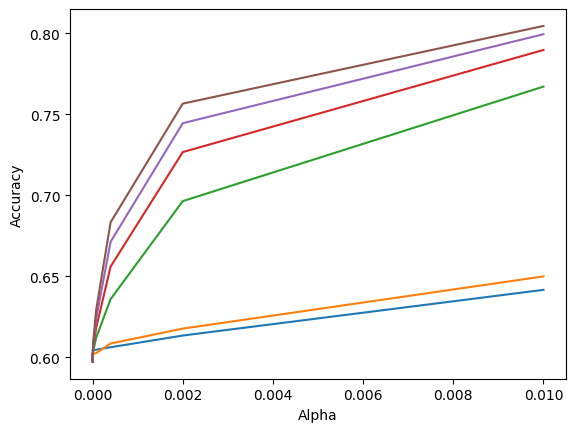

In [105]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train():
    bestest_model = [0, None, "None"]
    for modelStruct in modelList:
        xPoint = []
        yPoint = []
        name, modelCall = modelStruct
        print(f"{name}{"-" * 100}")
        lowestVal = [1000, 0, None, 0, 0, 0]
        for alpha in alphaList:
            model = modelCall(alpha)
            model.fit(X_train, y_train)
    
            #get MSEs
            train_pred = model.predict(X_train)
            train_mse  = mean_squared_error(y_train, train_pred)
            val_pred   = model.predict(X_val)
            val_mse    = mean_squared_error(y_val, val_pred)
            error      = abs(train_mse - val_mse)
            acc        = model.score(X_val, y_val)
            #I PONDERED IF ACCURACY IS PAC OR MODE.SCORE(), IN THE END I USED MODEL.SCORE()
    
            print(f"  alpha {alpha}\n   train:    {train_mse}\n   val:      {val_mse}\n   error:    {error}\n   accuracy: {acc}")
            if (lowestVal[5] < acc):
                lowestVal = [error, alpha, model, train_mse, val_mse, acc]
                if (bestest_model[0] < acc):
                    bestest_model = [acc, model, name]
            xPoint.append(alpha)
            yPoint.append(acc)
        plt.plot(xPoint, yPoint)
        best_model = lowestVal[2]
        #print requirements
        print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    print(f"Best model: {bestest_model[2]}")
    best_model = bestest_model[1]
    print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.show()
    return best_model
best_model = train()

In [106]:
numList = [[newColumns[i], abs(best_model.coef_[0][i])] for i in range(len(best_model.coef_[0]))]
sortList = sorted(numList, key=lambda num: num[1], reverse=True) 
top8 = [sortList[i][0] for i in range(8)]
print(top8)

['engine-type_l', 'make_mazda', 'engine-type_ohcf', 'make_audi', 'make_nissan', 'engine-type_ohcv', 'make_plymouth', 'make_volkswagen']


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    9341153.24108295
   val:      9429936.376211558
   error:    88783.13512860797
   accuracy: 0.06385752262098461
  alpha 0.002
   train:    9341110.077235425
   val:      9445918.838178033
   error:    104808.76094260812
   accuracy: 0.06319450353704
  alpha 0.0004
   train:    9341108.340132618
   val:      9449139.888094211
   error:    108031.54796159267
   accuracy: 0.06306069958709763
  alpha 8e-05
   train:    9341108.270563647
   val:      9449785.086340683
   error:    108676.81577703543
   accuracy: 0.06303389048548654
  alpha 1.6e-05
   train:    9341108.267780202
   val:      9449914.165568458
   error:    108805.8977882564
   accuracy: 0.06302852673023585
  alpha 3.2e-06
   train:    9341108.26766886
   val:      9449939.982997537
   error:    108831.71532867663
   accuracy: 0.06302745390176889
  alpha 6.4e-07
   train:    9341108

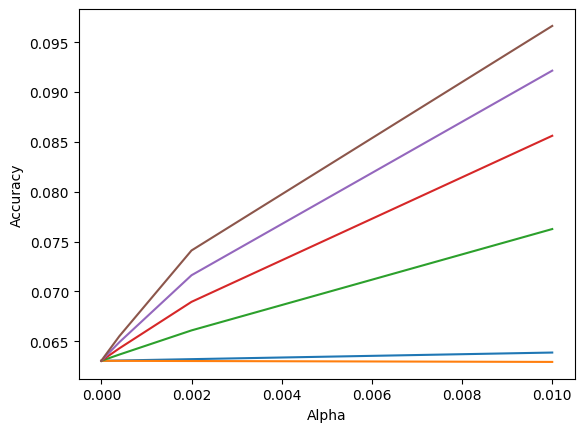

ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=50000)

In [107]:
X = dataCleaned[top8]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train()